In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Carga de datos y analisis general

In [2]:
estudiantes_df = pd.read_csv('../Data/StudentsPerformance_exam1.csv')
estudiantes_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,non-binary,group B,bachelor's degree,standard,none,72.0,72.0,NaN
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,NaN,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,NaN,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,NaN,65.0
998,NaN,group D,some college,standard,completed,68.0,78.0,77.0


In [3]:
estudiantes_df.shape

(1000, 8)

In [4]:
estudiantes_df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [23]:
estudiantes_df.describe()

,math score,reading score,writing score
count,949.000000,952.000000,951.000000
mean,66.120126,69.257353,68.181914
std,15.202026,14.551115,15.141074
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


# 1. Analaisis exploratorio por columnas

## 1.1. Columna gender

In [7]:
list(estudiantes_df['gender'].unique())

['non-binary', 'female', 'male', nan]

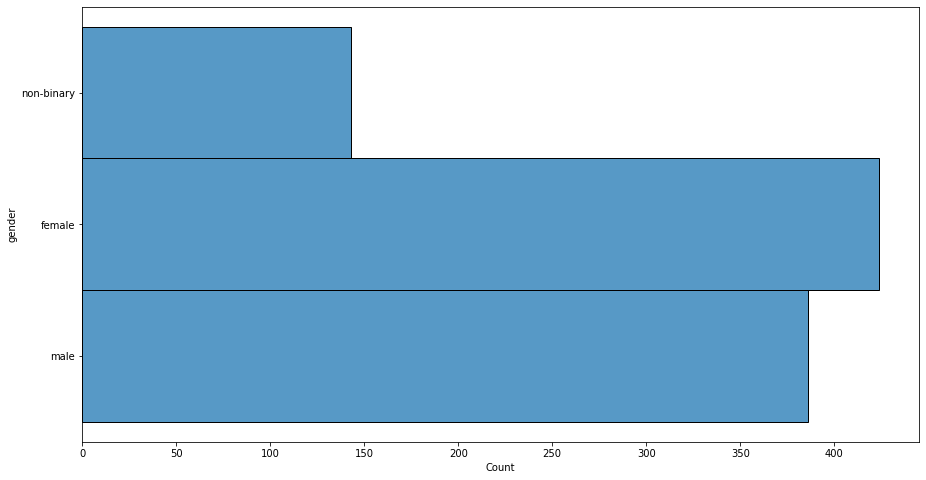

In [71]:
plt.figure(figsize=(15,8))
sns.histplot(data=estudiantes_df, y="gender")
plt.savefig('../images/gender.png')

## 1.2. Columna race/ethnicity 

In [9]:
list(estudiantes_df['race/ethnicity'].unique())

['group B', 'group C', 'group A', 'group D', 'group E', nan]

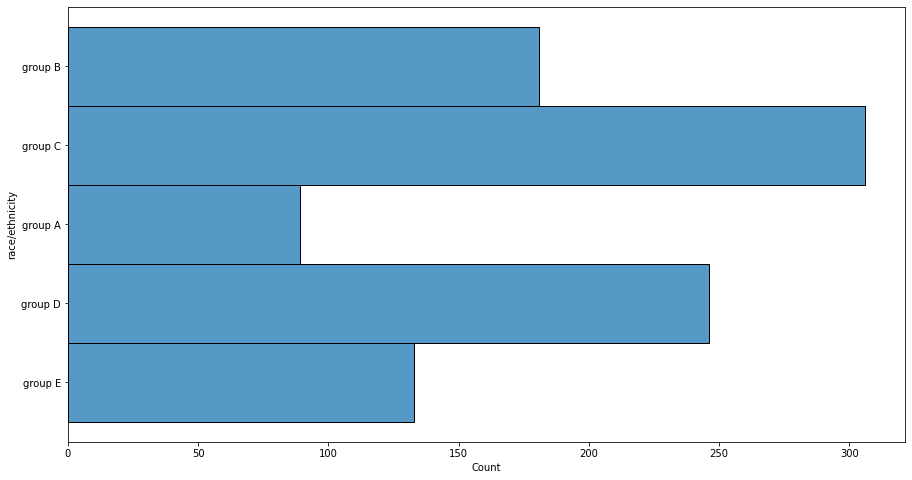

In [72]:
plt.figure(figsize=(15,8))
sns.histplot(data=estudiantes_df, y="race/ethnicity")
plt.savefig('../images/race.png')

## 1.3. Columna parental level of education

In [11]:
list(estudiantes_df['parental level of education'].unique())

["bachelor's degree",
 'some college',
 "master's degree",
 "associate's degree",
 'high school',
 'some high school',
 nan]

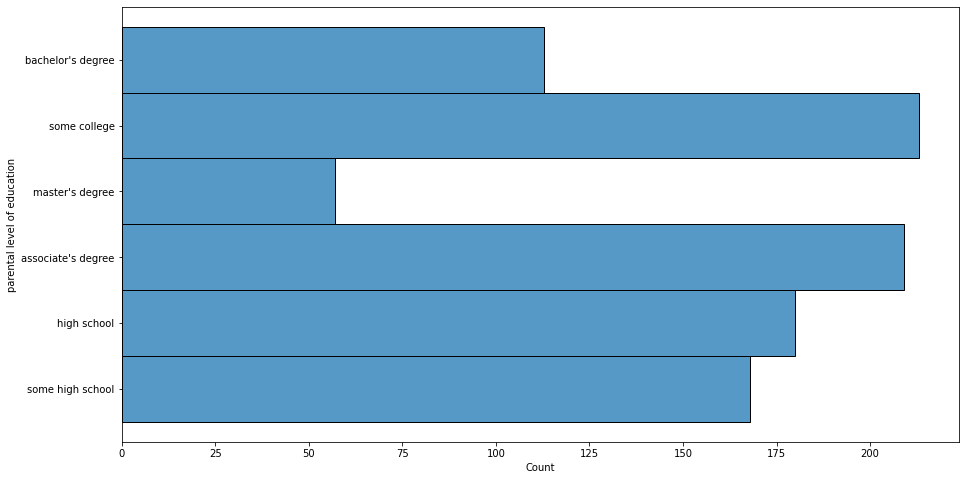

In [73]:
plt.figure(figsize=(15,8))
sns.histplot(data=estudiantes_df, y="parental level of education")
plt.savefig('../images/parentaleducation.png')

## 1.4. Columna lunch

In [13]:
list(estudiantes_df['lunch'].unique())

['standard', 'free/reduced', nan]

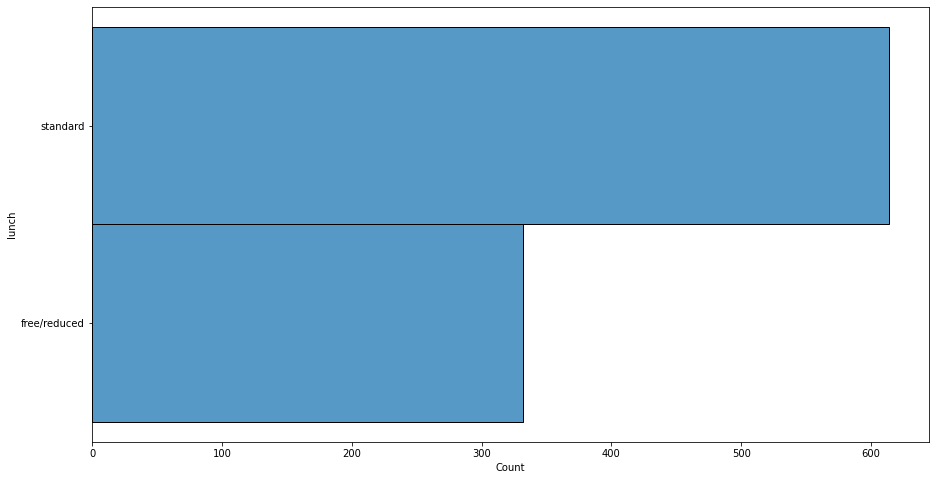

In [74]:
plt.figure(figsize=(15,8))
sns.histplot(data=estudiantes_df, y="lunch")
plt.savefig('../images/lunch.png')

## 1.5. Columna test preparation course 

In [14]:
list(estudiantes_df['test preparation course'].unique())

['none', 'completed', nan]

In [67]:
estudiantes_df['test preparation course'].value_counts()

none         607
completed    352
Name: test preparation course, dtype: int64

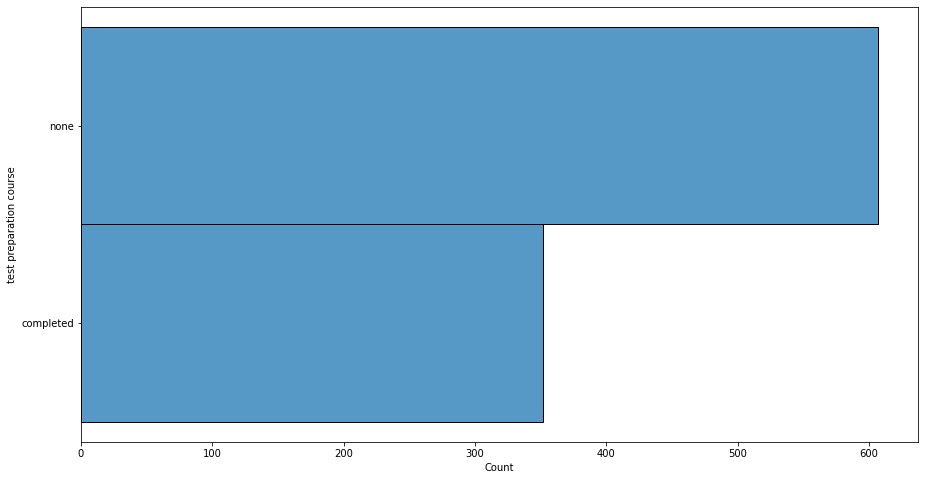

In [75]:
plt.figure(figsize=(15,8))
sns.histplot(data=estudiantes_df, y="test preparation course")
plt.savefig('../images/testpreparation.png')

## 1.6. Columna math score

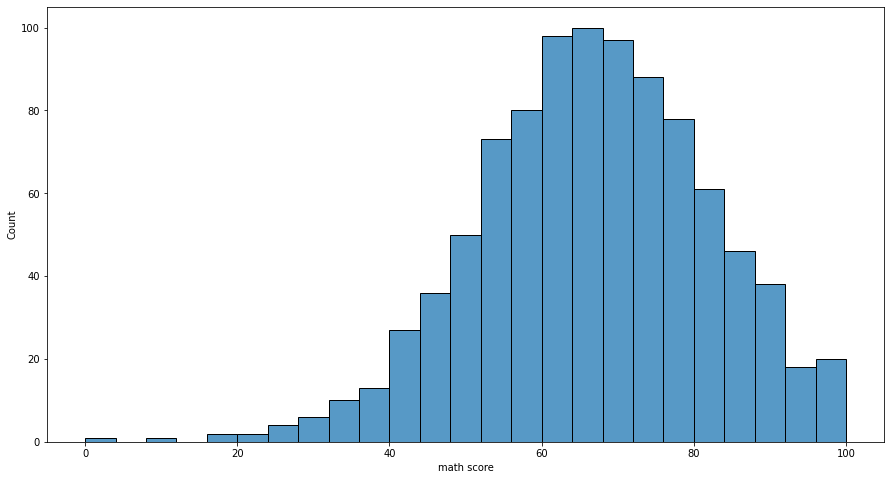

In [76]:
plt.figure(figsize=(15,8))
sns.histplot(data=estudiantes_df, x="math score")
plt.savefig('../images/mathscore.png')

## 1.7. Columna reading score

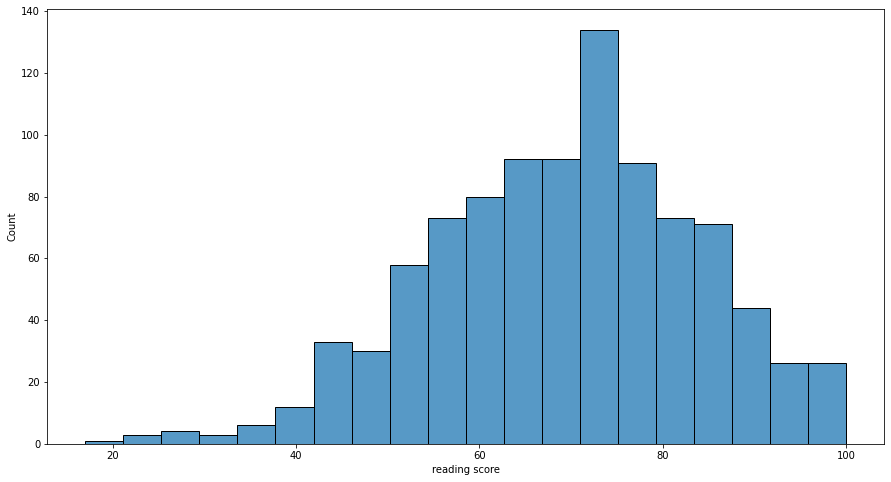

In [77]:
plt.figure(figsize=(15,8))
sns.histplot(data=estudiantes_df, x="reading score")
plt.savefig('../images/readingscore.png')

## 1.8. Columna writing score

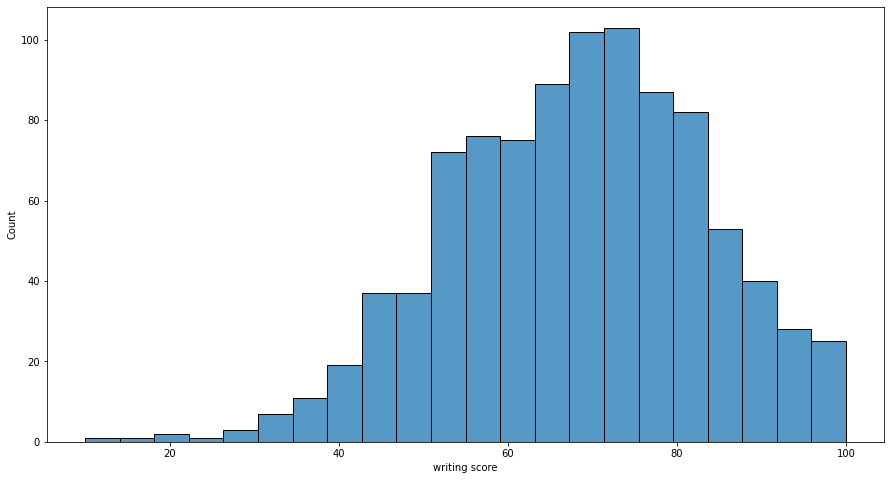

In [78]:
plt.figure(figsize=(15,8))
sns.histplot(data=estudiantes_df, x="writing score")
plt.savefig('../images/writingscore.png')

# 2. Limpieza de los datos

## 2.1. Revision si hay datos faltantes en los registros

In [24]:
estudiantes_df.isna().sum()

gender                         47
race/ethnicity                 45
parental level of education    60
lunch                          54
test preparation course        41
math score                     51
reading score                  48
writing score                  49
dtype: int64

## 2.2. Se quitan las filas con datos faltantes

In [26]:
estudiantes_df_clean = estudiantes_df.dropna()
estudiantes_df_clean

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
6,non-binary,group B,some college,standard,completed,88.0,95.0,92.0
7,male,group B,some college,free/reduced,none,40.0,43.0,39.0
...,...,...,...,...,...,...,...,...
990,male,group E,high school,free/reduced,completed,86.0,81.0,75.0
991,non-binary,group B,some high school,standard,completed,65.0,82.0,78.0
992,non-binary,group D,associate's degree,free/reduced,none,55.0,76.0,76.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0


# Analisis de correlacion

In [28]:
estudiantes_df.corr()

,math score,reading score,writing score
math score,1.000000,0.818880,0.800733
reading score,0.818880,1.000000,0.955338
writing score,0.800733,0.955338,1.000000


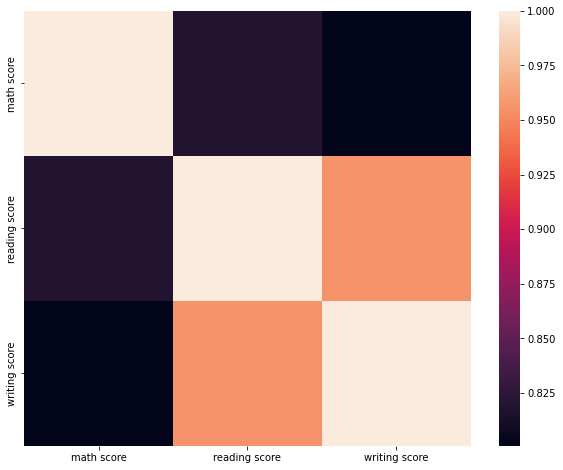

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(estudiantes_df.corr());
plt.savefig('../images/correlation.png')

In [31]:
estudiantes_df.corr('spearman')

,math score,reading score,writing score
math score,1.000000,0.806767,0.776943
reading score,0.806767,1.000000,0.950491
writing score,0.776943,0.950491,1.000000


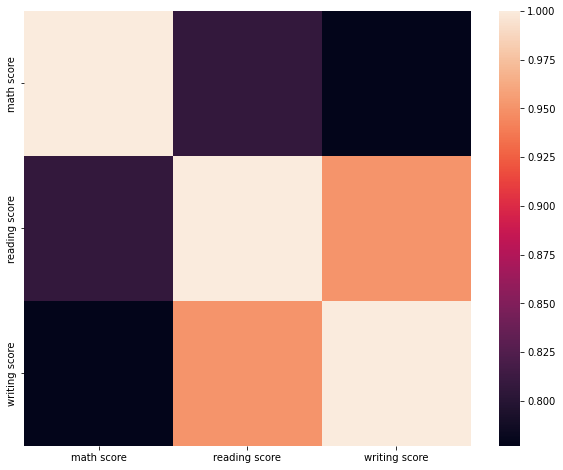

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(estudiantes_df.corr('spearman'));
plt.savefig('../images/correlationspearman.png')

# Analisis de genero vs puntajes

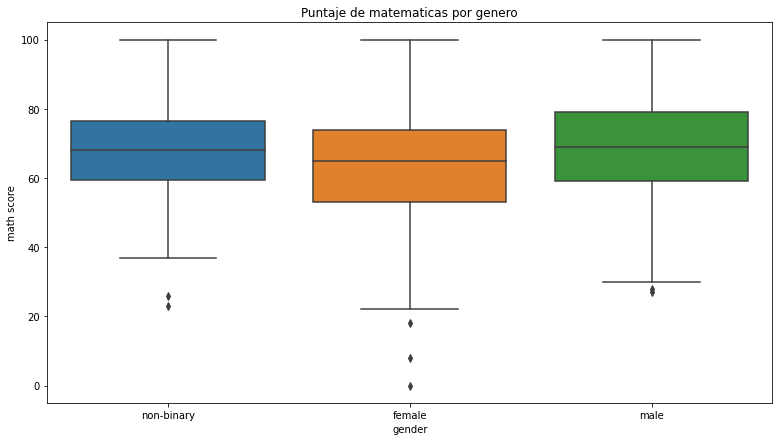

In [81]:
plt.figure(figsize = (13, 7))
sns.boxplot(x = 'gender', y = 'math score', data = estudiantes_df)
plt.title('Puntaje de matematicas por genero')
plt.savefig('../images/Puntajedematematicasporgenero.png')

Text(0.5, 1.0, 'Puntaje de lectura por genero')

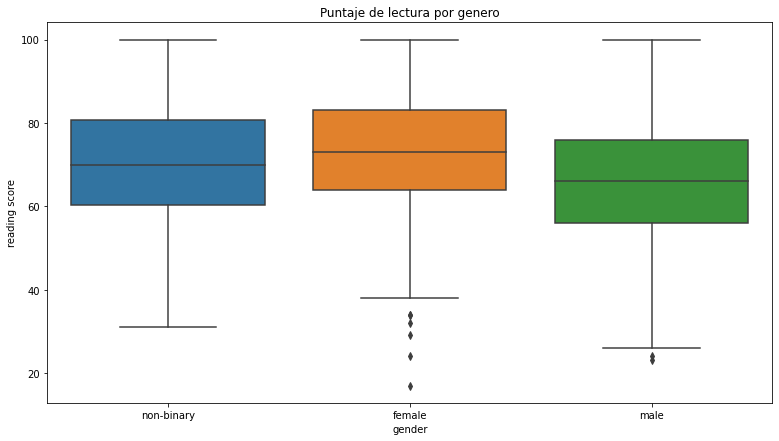

In [36]:
plt.figure(figsize = (13, 7))
sns.boxplot(x = 'gender', y = 'reading score', data = estudiantes_df)
plt.title('Puntaje de lectura por genero')

Text(0.5, 1.0, 'Puntaje de escritura por genero')

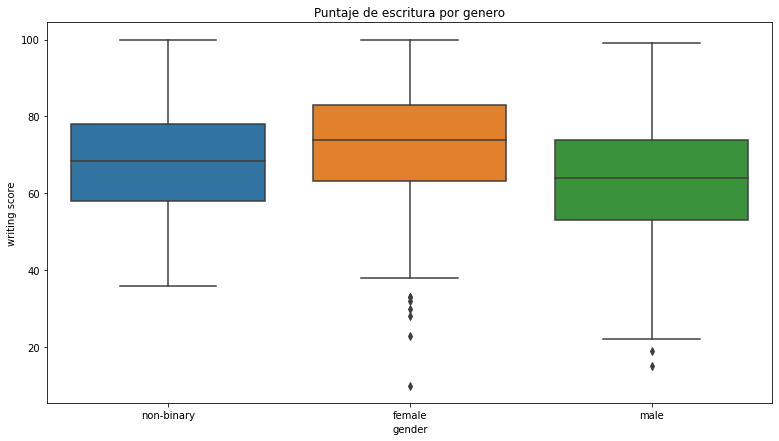

In [37]:
plt.figure(figsize = (13, 7))
sns.boxplot(x = 'gender', y = 'writing score', data = estudiantes_df)
plt.title('Puntaje de escritura por genero')

# Analisis escolaridad de los padres en los mejores estudiantes de escritura

In [43]:
mejores_estudiantes_escritura = estudiantes_df[estudiantes_df['writing score'] >= estudiantes_df['writing score'].quantile(.85)]
mejores_estudiantes_escritura

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
6,non-binary,group B,some college,standard,completed,88.0,95.0,92.0
16,male,group C,high school,standard,none,88.0,89.0,86.0
54,female,group C,some high school,free/reduced,completed,71.0,84.0,87.0
...,...,...,...,...,...,...,...,...
979,female,group C,associate's degree,standard,none,91.0,95.0,94.0
982,male,group B,some high school,standard,completed,79.0,85.0,86.0
983,female,group A,some college,standard,completed,78.0,87.0,91.0
995,female,group E,master's degree,standard,completed,88.0,NaN,95.0


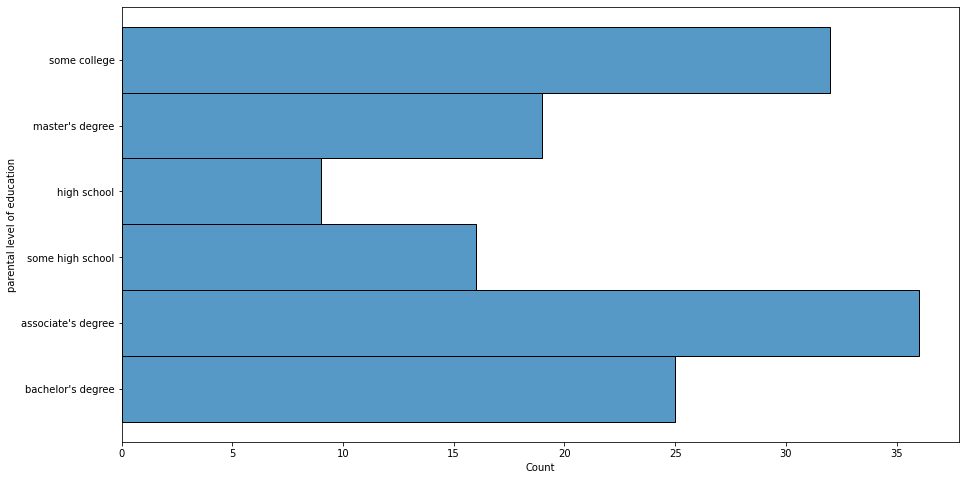

In [82]:
plt.figure(figsize=(15,8))
sns.histplot(data=mejores_estudiantes_escritura, y="parental level of education")
plt.savefig('../images/escolaridadpadresmejoresescritura.png')

# Analisis de preparacion para el examen por parte de los mejores estudiantes

In [57]:
mejores_estudiantes_absolutos = estudiantes_df[(estudiantes_df['writing score'] >= 90) & (estudiantes_df['math score'] >= 90) & (estudiantes_df['writing score'] >= 90)]
mejores_estudiantes_absolutos

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
104,male,group C,some college,standard,completed,98.0,86.0,90.0
114,non-binary,group E,bachelor's degree,standard,completed,99.0,100.0,100.0
121,male,group B,associate's degree,standard,completed,91.0,89.0,92.0
165,female,group C,bachelor's degree,standard,completed,96.0,100.0,100.0
263,female,group E,high school,NaN,none,99.0,93.0,90.0
451,female,group E,some college,standard,none,100.0,92.0,97.0
458,female,group E,bachelor's degree,standard,none,100.0,100.0,100.0
474,female,group B,associate's degree,standard,completed,90.0,90.0,91.0
501,non-binary,group B,NaN,NaN,completed,94.0,87.0,92.0


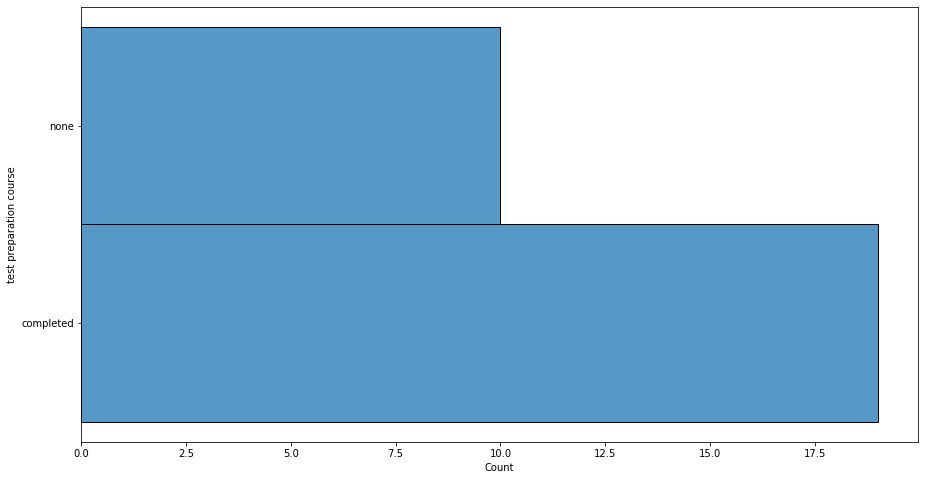

In [83]:
plt.figure(figsize=(15,8))
sns.histplot(data=mejores_estudiantes_absolutos, y="test preparation course")
plt.savefig('../images/preparacionmejoresestudiantes.png')

In [62]:
mejores_estudiantes_absolutos["test preparation course"].value_counts()

completed    19
none         10
Name: test preparation course, dtype: int64

In [64]:
19/29

0.6551724137931034